In [1]:
!pip install -U --user transformers tensorflow==2.0 torch==1.4.0+cpu torchvision==0.5.0+cpu -f https://download.pytorch.org/whl/torch_stable.html 

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: transformers in c:\users\szwang\appdata\roaming\python\python37\site-packages (2.5.0)
  Using cached https://files.pythonhosted.org/packages/54/5f/e1b2d83b808f978f51b7ce109315154da3a3d4151aa59686002681f2e109/tensorflow-2.0.0-cp37-cp37m-win_amd64.whl
Requirement already up-to-date: torch==1.4.0+cpu in c:\users\szwang\appdata\roaming\python\python37\site-packages (1.4.0+cpu)
Requirement already up-to-date: torchvision==0.5.0+cpu in c:\users\szwang\appdata\roaming\python\python37\site-packages (0.5.0+cpu)
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
  Found existing installation: tensorboard 2.1.0
    Uninstallin

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import torch
import random
from tensorflow.keras.layers import *
from transformers_Leo import TFBertModel, TFBertForPreTraining, BertTokenizer, TFBertForSequenceClassification, BertConfig, glue_convert_examples_to_features, glue_processors
print(tf.__version__, torch.__version__)

2.0.0 1.4.0+cpu


Convert TF to PT:
(base) D:\python\LEO_TM\BERT_chinese_LM_processing\Data\NSL_POC\pretrained\trans
formers-master>python transformers-cli convert --model_type bert --tf_checkpoint
 ../pretrained_output/model.ckpt-0  --config ../pretrained_output/config.json --
pytorch_dump_output ../pretrained_output/pytorch_model.bin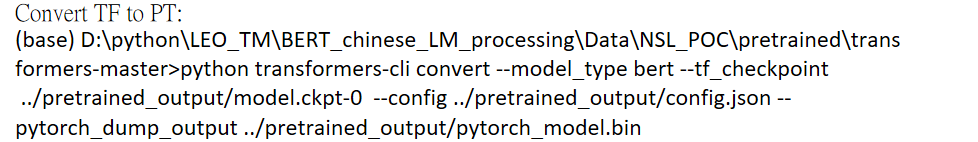

In [19]:
data_dir = '../Data/NSL_POC/'
train_df = pickle.load(open(data_dir+'clf_train.pkl','rb'))
train_df

,pretrained,Label
0,金管保壽字第10502548153號核釋「保險業辦理國外投資管理辦法」第15條第9項規定，有...,AT
1,金管保財字第10502505671號修正「保險業財務報告編製準則」部分條文及第19條格式1、...,F&A
2,金管保綜字第10602560561號修正「保險業防制洗錢及打擊資助恐怖主義注意事項」，並修正...,OTHERS
3,金管證發字第1060001296號修正「公開發行公司取得或處分資產處理準則」部分條文。一、明...,GA
4,金管保財字10500909790准予備查「保險業風險管理實務守則」為強化保險業風險控管，並配...,RM
5,金管保財字第10610908021號核釋保險業資金辦理專案運用投資屬「保險業資金辦理專案運用...,ISD
6,金管保壽字第10610908141號函核復「保險業承保身心障礙者處理原則」一、為避免身心障礙...,UW
7,金管保財字第10610908021號令修正「保險業辦理再保險分出分入及其他危險分散機制管理辦...,AT
8,金管保產字第10502121090號函「保險業公司治理實務守則」部分條文修正草案，請依說明修...,SEC
9,金管保壽字第10602542301號令修正「保險業授權代收保險費應注意事項」，自即日生效。一...,PC


In [20]:
labelID_dict = {}
for i,label in enumerate(set(train_df.Label.tolist())):
    labelID_dict[label] = i
# pickle.dump(obj=labelID_dict,file=open(data_dir+'labelID_dict.pkl','wb'))
labelID_dict = pickle.load(open(data_dir+'labelID_dict.pkl','rb'))
print(labelID_dict)

{'AA': 0, 'UW': 1, 'HR': 2, 'POS': 3, 'ILPD': 4, 'CU': 5, 'AT': 6, 'PC': 7, 'OIU': 8, 'SEC': 9, 'AI': 10, 'OTHERS': 11, 'RM': 12, 'ISD': 13, 'GA': 14, 'F&A': 15, 'PD': 16}


In [21]:
trainX = train_df.pretrained.tolist()
trainY = train_df.Label.tolist()
train_Y = np.array([labelID_dict[x] for x in trainY])
print(train_Y.shape)
assert len(trainX) == len(train_Y)

(35,)


In [22]:
model_dir = '../Data/NSL_POC/pretrained/pretrained_output/'

# 'hfl/chinese-roberta-wwm-ext'
config = BertConfig.from_pretrained(model_dir+'config.json',num_labels=len(labelID_dict)) # model_dir+'config.json' from_pretrained , num_labels=len(labelID_dict)
# config.output_hidden_states=True
tokenizer = BertTokenizer.from_pretrained(model_dir) #model_dir
model = TFBertForSequenceClassification.from_pretrained(model_dir+'pytorch_model.bin', config=config, from_pt=True)
# model = TFBertModel.from_pretrained(model_dir+'pytorch_model.bin', from_pt=True, config=config) # BertModel
# model = Dense(17,activation='softmax')(model)
# model.add(Dense(17,activation='softmax'))
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert_Leo (TFBertMainLayer)   multiple                  102267648 
_________________________________________________________________
dropout_75 (Dropout)         multiple                  0         
_________________________________________________________________
classifier_Leo (Dense)       multiple                  13073     
Total params: 102,280,721
Trainable params: 102,280,721
Non-trainable params: 0
_________________________________________________________________


#### CLF:
* Batch size: 16, 32
* Learning rate (Adam): 5e-5, 3e-5, 2e-5
* Number of epochs: 3, 4

#### LM:


train with batch size of 256 sequences (256
sequences * 512 tokens = 128,000 tokens/batch)
for 1,000,000 steps, which is approximately 40
epochs over the 3.3 billion word corpus. We
use Adam with learning rate of 1e-4, β1 = 0.9,
β2 = 0.999, L2 weight decay of 0.01, learning
rate warmup over the first 10,000 steps, and linear
decay of the learning rate. We use a dropout probability of 0.1 on all layers. We use a gelu activation (Hendrycks and Gimpel, 2016) rather than
the standard relu, following OpenAI GPT. The
training loss is the sum of the mean masked LM
likelihood and mean next sentence prediction likelihood

In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=5e-5)#learning_rate=0.001)#Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #from_logits=False
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=opt, loss=loss, metrics=[metric])


In [24]:
def data_generator(data, targets, batch_size,train=True):
    '''
    data: train_X
    targets: train_Y
    '''
    if train == True:
        idx = np.arange(len(data))
        np.random.shuffle(idx)
        batches = [idx[range(batch_size*i, min(len(data), batch_size*(i+1)))] for i in range(int(len(data)/batch_size)+1)]
        while True:
            for i in batches:
    #             print(i,targets,batches)
                yy = np.array(targets[i])
                xx = []
                for ii in i:
                    if len(data[ii])>512:
                        length_id = random.randint(512,len(data[ii]))
                        x = tf.constant(tokenizer.encode(data[ii], add_special_tokens=True))[length_id-512:length_id]
                    else:
                        x = tf.constant(tokenizer.encode(data[ii], add_special_tokens=True))[:512]
                    if batch_size == 1:
    #                     print(x,yy)
                        yield (np.array([x]),yy)
                    else:
                        xx.append(np.array([x]))
                if batch_size == 1:
                    continue
    #             xx = np.array(xx)
    #             xx, yy = data[i], np.array([targets[i]])
    #             if len(xx)>512:
    #                 length_id = random.randint(512,len(xx))
    #                 xx = tf.constant(tokenizer.encode(xx, add_special_tokens=True))[length_id-512:length_id]
    #                 xx = xx[length_id-512:length_id]
                yield (xx, yy)
    else:
        idx = np.arange(len(data))
        np.random.shuffle(idx)
        batches = [idx[range(batch_size*i, min(len(data), batch_size*(i+1)))] for i in range(int(len(data)/batch_size)+1)]        
        while True:
            for i in batches:
    #             print(i,targets,batches)
                yy = np.array(targets[i])
                xx = []
                for ii in i:
                    x = tf.constant(tokenizer.encode(data[ii], add_special_tokens=True))[:512]
                    if batch_size == 1:
    #                     print(x,yy)
                        yield (np.array([x]),yy)
                    else:
                        print('err, not implement')

In [25]:
BATCH_SIZE = 1#4#1
train_steps = len(trainX)//BATCH_SIZE

In [26]:
from tensorflow.python.framework.ops import disable_eager_execution, enable_eager_execution
# disable_eager_execution()
# tf.keras.backend.clear_session()
# tf.compat.v1.reset_default_graph()

In [27]:
save_dir = model_dir + 'classifier1'
cb1 = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir+'.hdf5', verbose=1,save_best_only=True, monitor='val_acc')
cb2 = tf.keras.callbacks.EarlyStopping(patience=2)
cb3 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=1, min_lr=1e-5)
history = model.fit_generator(data_generator(trainX,train_Y,BATCH_SIZE,train=True),
                              validation_data=data_generator(trainX,train_Y,BATCH_SIZE,train=False)
                              ,validation_steps=train_steps,steps_per_epoch=train_steps,epochs=15,callbacks=[cb1,cb2,cb3])

Epoch 1/15
35/35 [==============================] - 435s 12s/step - loss: 2.8346 - accuracy: 0.0674 - val_loss: 2.7983 - val_accuracy: 0.1429
Epoch 2/15
35/35 [==============================] - 440s 13s/step - loss: 2.8031 - accuracy: 0.0644 - val_loss: 2.7848 - val_accuracy: 0.1429
Epoch 3/15
35/35 [==============================] - 458s 13s/step - loss: 2.7899 - accuracy: 0.1083 - val_loss: 2.7833 - val_accuracy: 0.1429
Epoch 4/15
35/35 [==============================] - 433s 12s/step - loss: 2.7873 - accuracy: 0.1083 - val_loss: 2.7830 - val_accuracy: 0.1429
Epoch 5/15


35/35 [==============================] - 442s 13s/step - loss: 2.7845 - accuracy: 0.1083 - val_loss: 2.7817 - val_accuracy: 0.1429
Epoch 6/15
35/35 [==============================] - 462s 13s/step - loss: 2.7886 - accuracy: 0.1083 - val_loss: 2.7821 - val_accuracy: 0.1429
Epoch 7/15
35/35 [==============================] - 425s 12s/step - loss: 2.7838 - accuracy: 0.1083 - val_loss: 2.7808 - val_accuracy: 0.1429
Epoch 8/15
35/35 [==============================] - 441s 13s/step - loss: 2.7823 - accuracy: 0.1083 - val_loss: 2.7796 - val_accuracy: 0.1429
Epoch 9/15


35/35 [==============================] - 447s 13s/step - loss: 2.7871 - accuracy: 0.1083 - val_loss: 2.7797 - val_accuracy: 0.1429
Epoch 10/15
35/35 [==============================] - 430s 12s/step - loss: 2.7835 - accuracy: 0.1083 - val_loss: 2.7794 - val_accuracy: 0.1429
Epoch 11/15
35/35 [==============================] - 430s 12s/step - loss: 2.7819 - accuracy: 0.1083 - val_loss: 2.7791 - val_accuracy: 0.1429
Epoch 12/15
35/35 [==============================] - 470s 13s/step - loss: 2.7778 - accuracy: 0.1083 - val_loss: 2.7783 - val_accuracy: 0.1429
Epoch 13/15


35/35 [==============================] - 432s 12s/step - loss: 2.7810 - accuracy: 0.1083 - val_loss: 2.7782 - val_accuracy: 0.1429
Epoch 14/15
35/35 [==============================] - 447s 13s/step - loss: 2.7798 - accuracy: 0.1083 - val_loss: 2.7786 - val_accuracy: 0.1429
Epoch 15/15
35/35 [==============================] - 448s 13s/step - loss: 2.7761 - accuracy: 0.1083 - val_loss: 2.7807 - val_accuracy: 0.1429


In [ ]:
model.evaluate()

In [12]:
save_dir = model_dir + 'classifier1/'
os.makedirs(save_dir, exist_ok=True)
model.save_pretrained(save_dir)
tokenizer.save_pretrained(save_dir)

('../Data/NSL_POC/pretrained/pretrained_output/vocab.txt',
 '../Data/NSL_POC/pretrained/pretrained_output/special_tokens_map.json',
 '../Data/NSL_POC/pretrained/pretrained_output/added_tokens.json')

In [48]:
[train_Y[0]]

[6]

In [47]:
train_Y_ = trai

array([ 6, 15, 11, 14, 12, 13,  1,  6,  9,  7, 10,  2,  1,  9,  6, 10,  6,
        9,  8,  9, 15, 13, 16, 10, 12,  0, 15,  2, 16,  3,  5, 11,  4,  6,
       16])

In [12]:
train_X = tokenizer.encode(trainX[0])

In [21]:
len(train_X[:512])

512

In [37]:
trainX[0]

'金管保壽字第10502548153號核釋「保險業辦理國外投資管理辦法」第15條第9項規定，有關人身保險業最近一年之商品結構綜合評分值符合所列標準之一者，得擇一適用本辦法第15條第9項第1款或第2款所列措施相關規定，自106年1月1日生效。一、依據保險業辦理國外投資管理辦法（以下簡稱本辦法）第十五條第九項規定辦理二、人身保險業最近一年之商品結構綜合評分值（計算方式及匯率換算基準詳附件）符合下列標準之一者，得擇一適用本辦法第十五條第九項第一款或第二款所列措施：(一)人身保險業最近一年之商品結構綜合評分值位於全業界七十百分位以上者(二)人身保險業最近一年之商品結構綜合評分值較上年度增加達零點一（含）以上者、或人身保險業最近一年之商品結構綜合評分值達零點九（含）惟未達零點九五，且較上年度增加達零點零二（含）以上者、或人身保險業最近一年之商品結構綜合評分值達零點九五（含）至一之間，且較上年度增加達零點零一（含）以上者三、首次符合前點標準之人身保險業，應於本會核定之一年適用期間起始日起七日內，就擇定適用本辦法第十五條第九項相關款次所列措施函報本會備查，逾期視同適用本辦法第十五條第九項第二款規定，且於適用期間內不得再申請變更；非首次符合前點標準者，亦同但維持前所擇定適用之措施者，無須函報本會備查四、人身保險業原符合第二點標準，如於次年度未符合標準者，於原核定適用期間屆滿起六個月內應予調整國外投資部位，稽核部門應予以追蹤控管；如於六個月內仍無法改正逾限部位之調整情事，稽核部門應立即陳報本會並提出書面說明及具體改善計畫五、人身保險業因前點規定需調整投資部位者，如於同一年度依據本辦法第十五條第一項或第四項規定經本會核准提高國外投資額度，或依據本辦法第十五條之二規定經本會核准不計入國外投資額度者，得逕依據本會最新一次核准之國外投資額度辦理，不適用前點規定六、本令自中華民國一百零六年一月一日生效；本會一百零三年十二月十日金管保壽字第一○三○二五五三○○一號令自同日廢止'

In [7]:
input_ids = tf.constant(tokenizer.encode(trainX[0], add_special_tokens=True))[None, :512]
model(input_ids)

(<tf.Tensor: id=7933, shape=(1, 17), dtype=float32, numpy=
 array([[0.03007534, 0.04569976, 0.04140639, 0.1020798 , 0.03940167,
         0.04641188, 0.08015193, 0.0469086 , 0.04661325, 0.0888615 ,
         0.02681581, 0.02517687, 0.06477679, 0.09038366, 0.06841635,
         0.06499767, 0.09182269]], dtype=float32)>,)

In [41]:
input_ids

<tf.Tensor: id=46472, shape=(1, 512), dtype=int32, numpy=
array([[ 101, 7032, 5052,  924, 1904, 2099, 5018, 8423, 8904, 9488, 9313,
        9310, 5998, 3417, 7026,  519,  924, 7402, 3511, 6794, 4415, 1751,
        1912, 2832, 6536, 5052, 4415, 6794, 3791,  520, 5018, 8115, 3454,
        5018,  130, 7517, 6211, 2137, 8024, 3300, 7302,  782, 6716,  924,
        7402, 3511, 3297, 6818,  671, 2399,  722, 1555, 1501, 5178, 3539,
        5198, 1394, 6268, 1146,  966, 5016, 1394, 2792, 1154, 3560, 3976,
         722,  671, 5442, 8024, 2533, 3079,  671, 6900, 4500, 3315, 6794,
        3791, 5018, 8115, 3454, 5018,  130, 7517, 5018,  122, 3621, 2772,
        5018,  123, 3621, 2792, 1154, 2974, 3177, 4685, 7302, 6211, 2137,
        8024, 5632, 8438, 2399,  122, 3299,  122, 3189, 4495, 3126,  511,
         671,  510,  898, 3087,  924, 7402, 3511, 6794, 4415, 1751, 1912,
        2832, 6536, 5052, 4415, 6794, 3791, 8020,  809,  678, 5080, 4935,
        3315, 6794, 3791, 8021, 5018, 1282,  758, 3454

In [45]:
input_ids #new

<tf.Tensor: shape=(1, 512), dtype=int32, numpy=
array([[ 101, 7032, 5052,  924, 1904, 2099, 5018, 8423, 8904, 9488, 9313,
        9310, 5998, 3417, 7026,  519,  924, 7402, 3511, 6794, 4415, 1751,
        1912, 2832, 6536, 5052, 4415, 6794, 3791,  520, 5018, 8115, 3454,
        5018,  130, 7517, 6211, 2137, 8024, 3300, 7302,  782, 6716,  924,
        7402, 3511, 3297, 6818,  671, 2399,  722, 1555, 1501, 5178, 3539,
        5198, 1394, 6268, 1146,  966, 5016, 1394, 2792, 1154, 3560, 3976,
         722,  671, 5442, 8024, 2533, 3079,  671, 6900, 4500, 3315, 6794,
        3791, 5018, 8115, 3454, 5018,  130, 7517, 5018,  122, 3621, 2772,
        5018,  123, 3621, 2792, 1154, 2974, 3177, 4685, 7302, 6211, 2137,
        8024, 5632, 8438, 2399,  122, 3299,  122, 3189, 4495, 3126,  511,
         671,  510,  898, 3087,  924, 7402, 3511, 6794, 4415, 1751, 1912,
        2832, 6536, 5052, 4415, 6794, 3791, 8020,  809,  678, 5080, 4935,
        3315, 6794, 3791, 8021, 5018, 1282,  758, 3454, 5018,  7

Play ground

In [6]:
!pip install tensorflow-datasets transformers tensorflow

  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78598 sha256=fa60f0e28150eb6aebafb0f03c3a37fe8401e8fca8cc5829d319b9428aa346e5
  Stored in directory: C:\Users\szwang\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Created wheel for promise: filename=promise-2.3-cp37-none-any.whl size=21500 sha256=945651077f8c79912f94fcee5eaadb0c5b500236500321a5435e0f02a1ef8d50
  Stored in directory: C:\Users\szwang\AppData\Local\pip\Cache\wheels\19\49\34\c3c1e78bcb954c49e5ec0d31784fe63d14d427f316b12fbde9
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp37-none-any.whl size=884633 sha256=5c7de5168fae7eac819c532e0bf9a781b96c33add2d35c47fa96bc5c110832e6
  Stored in directory: C:\Users\szwang\AppData\Local\pip\Cache\wheels\6d\ec\1a\21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
  Created wheel for googleapis-common-protos: filename=googleapis_common_protos-1.51.0-cp37-none-any.whl size=77603 sha256=061cf77ad0a1803015e79712da

In [ ]:
# tensorflow 

In [7]:
import os
import tensorflow as tf
import tensorflow_datasets
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig, glue_convert_examples_to_features, glue_processors

In [8]:
# script parameters
BATCH_SIZE = 32
EVAL_BATCH_SIZE = BATCH_SIZE * 2
EPOCHS = 3

TASK = "sst-2"

if TASK == "sst-2":
    TFDS_TASK = "sst2"
elif TASK == "sts-b":
    TFDS_TASK = "stsb"
else:
    TFDS_TASK = TASK

In [9]:
num_labels = len(glue_processors[TASK]().get_labels())
print(num_labels)

2


In [18]:
data, info = tensorflow_datasets.load(f'glue/{TFDS_TASK}',in_memory=True, data_dir='D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds',with_info=True)
train_dataset = glue_convert_examples_to_features(data['train'], tokenizer, 128, TASK)


INFO:absl:Load pre-computed datasetinfo (eg: splits) from bucket.
INFO:absl:Loading info from GCS for glue/sst2/1.0.0
INFO:absl:Field info.description from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.location from disk and from code do not match. Keeping the one from code.
INFO:absl:Generating dataset glue (D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\glue\sst2\1.0.0)


INFO:absl:URL https://firebasestorage.googleapis.com/v0/b/mtl-sentence-representations.appspot.com/o/data%2FSST-2.zip?alt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8 already downloaded: reusing D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\downloads\fire.goog.com_v0_b_mtl-sent-repr.apps.co1n4W-1VznBsyzc6Yd1ltscEn3DItk8CCKB9kBXwW3qo.zipalt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8.


ExtractError: Error while extracting D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\downloads\fire.goog.com_v0_b_mtl-sent-repr.apps.co1n4W-1VznBsyzc6Yd1ltscEn3DItk8CCKB9kBXwW3qo.zipalt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8 to D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\downloads\extracted\ZIP.fire.goog.com_v0_b_mtl-sent-repr.apps.co1n4W-1VznBsyzc6Yd1ltscEn3DItk8CCKB9kBXwW3qo.zipalt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8 (file: SST-2) : Failed to create a directory: D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\downloads\extracted\ZIP.fire.goog.com_v0_b_mtl-sent-repr.apps.co1n4W-1VznBsyzc6Yd1ltscEn3DItk8CCKB9kBXwW3qo.zipalt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8.incomplete_81863b0bc2fb4b50abbf0239c21aaf8f; No such file or directory

NameError: name 'data' is not defined